In [41]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score
import seaborn as sns

In [42]:
data = pd.read_csv("Sentiment Analysis Using Naive Bayes Data.csv", names=["txt","Liked"])
data.head()

,txt,Liked
0,text,label
1,I grew up (b. 1965) watching and loving the Th...,0
2,"When I put this movie in my DVD player, and sa...",0
3,Why do people who do not know what a particula...,0
4,Even though I have great interest in Biblical ...,0


In [43]:
stopset= set(stopwords.words("english"))
vectorizer = TfidfVectorizer(use_idf=True,lowercase=True,strip_accents="ascii",stop_words=stopset)

In [44]:
y = data.Liked

In [45]:
y.shape

(40001,)

In [46]:
x = vectorizer.fit_transform(data.txt)

In [47]:
x.shape

(40001, 92838)

In [48]:
x[0]

<1x92838 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [49]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,random_state=42)

In [50]:
clf = naive_bayes.MultinomialNB()
clf.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
y_predict = clf.predict_proba(x_test)[:,1]

In [52]:
roc_auc_score(y_test,y_predict)

0.9416867082097434

In [53]:
import numpy as np
my_review = np.array(["3 idiot is a very good movie, I recomand it to watch, good good good"])
mr = vectorizer.transform(my_review)
clf.predict(mr)

array(['0'], dtype='<U5')

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
y_pre = clf.predict(x_test)

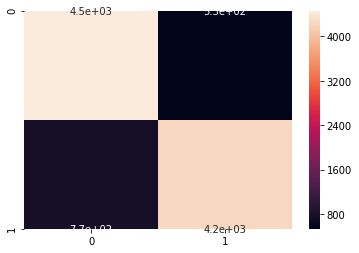

In [56]:
cm = confusion_matrix(y_test, y_pre)
sns.heatmap(cm, annot = True)

In [57]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4984
           1       0.89      0.85      0.87      5017

    accuracy                           0.87     10001
   macro avg       0.87      0.87      0.87     10001
weighted avg       0.87      0.87      0.87     10001

